# Проект: Анализ убытков развлекательного приложения


<a id=content></a>
**План исследования:**

* [1. Обзор данных](#1)
 * [1.1: Загрузка данных](#1_1)
 * [1.2: Обзор данных](#1_2)
 * [1.3:Описание данных](#1_3)
 * [1.4: Вывод подраздела](#1_4)
 
 
* [2. Предобработка данных](#2)
 * [2.1: Проверка названий столбцов](#2_1)
 * [2.2: Проверим данные на пропуски](#2_2)
 * [2.3: Приведем данные к нужным типам](#2_3)
 * [2.4: Проверим на наличие дубликатов](#2_4)
 * [2.5: Вывод подраздела](#2_5)
 
 
* [3. Зададим функции для дальнейшего расчета и анализа и проведем исследовательский анализ данных](#3)
 * [3.1: Создадим пользовательские профили. Определим минимальную и максимальную даты привлечения пользователей](#3_1)
 * [3.2: Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны](#3_2)
 * [3.3: Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства](#3_3)
 * [3.4: Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения](#3_4)
 * [3.5: Вывод подраздела](#3_5)
 
 
* [4. Исследовательский анализ данных](#4)
 * [4.1: Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам. Визуализируем изменения метрик во времени](#4_1)
 * [4.2. Узнаем, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика. Используем профили пользователей](#4_2)
 * [4.2: Вывод подраздела](#4_3)
 
 
* [5. Изучение маркетинга](#5)
 * [5.1: Проанализируем общую окупаемость рекламы](#5_1)
 * [5.2: Проанализируем окупаемость рекламы с разбивкой по рекламным каналам](#5_2)
 * [5.3: Проанализируем окупаемость рекламы с разбивкой по странам](#5_3)
 * [5.4: Построим и изучим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам](#5_4)
 * [5.5: Вывод подраздела](#5_5)
 
 
* [6. Изучение окупаемости рекламы](#6)
 * [6.1: Выделите причины неэффективности привлечения пользователей](#6_1)
 * [6.2: Сформулируйте рекомендации для отдела маркетинга](#6_2)
 
 
* [7. Общий итог исследования](#7)

<a id=1></a>
## [1. Обзор данных](#content)

Самый первый этап нашего исследования. В самом начале мы загрузим данные и положим их в переменные. Затем выведем общую информацию о данных. Напишем описание данных. Сделаем выводы подраздела.

В нашем распоряжении **три датасета**. 
* **visits_info_short.csv** - хранит лог сервера с информацией о посещениях сайта;
* **orders_info_short.csv** - информацию о покупках;
* **costs_info_short.csv** - информацию о расходах на рекламу.

<a id=1_1></a>
### [1.1: Загрузка данных](#content)

Загрузим датасеты и присвоим им следующие переменные:
* **visits** - будет хранить лог сервера с информацией о посещениях сайта;
* **orders** - будет информацию о покупках пользователей;
* **costs** - будет хранить информацию о расходах на рекламу.

In [1]:
# импортируем библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

In [2]:
# создадим переменные и положим туда данные

try: 
    visits = pd.read_csv('data/visits_info_short.csv')
    orders = pd.read_csv('data/orders_info_short.csv')
    costs = pd.read_csv('data/costs_info_short.csv')
except:
    visits = pd.read_csv('link to the file')
    orders = pd.read_csv('link to the file')
    costs = pd.read_csv('link to the file')

<a id=1_2></a>
### [1.2: Обзор данных](#content)

В нашем распоряжении 3 датасета. Выведем на экран первые каждый из них и общую информацию по ним.

**visits**

Выведем на экран первые 5 строк таблицы и общую информацию о ней.

In [3]:
# выведем первые 5 строк переменной visits

print('Информация о посещениях сайта:')
print()
visits.head(5)

Информация о посещениях сайта:



,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
# выведем общую информацию о переменной visits

print('Общая информация о таблице visits:')
print()
visits.info()

Общая информация о таблице visits:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Изучив первые 5 строк таблицы и общую информацию о ней, мы видим следующее:
* таблица состоит из **309 900** строк и **6** столбцов;
* **неправильное** название столбцов;
* **нет** пропущенных значений;
* в некоторых столбцах следует **изменить тип данных**.


**orders**

Выведем на экран первые 5 строк таблицы и общую информацию о ней.

In [5]:
# выведем первые 5 строк переменной orders

print('Информация о покупках пользователей:')
print()
orders.head(5)

Информация о покупках пользователей:



,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [6]:
# выведем общую информацию о переменной orders

print('Общая информация о таблице orders:')
print()
orders.info()

Общая информация о таблице orders:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Изучив первые 5 строк таблицы и общую информацию о ней, мы видим следующее:
* таблица состоит из **40 212** строк и **3** столбцов;
* **неправильное** название столбцов;
* **нет** пропущенных значений;
* в некоторых столбцах следует **изменить тип данных**.

**costs**

Выведем на экран первые 5 строк таблицы и общую информацию о ней.

In [7]:
# выведем первые 5 строк переменной costs

print('Информация о расходах на рекламу:')
print()
costs.head(5)

Информация о расходах на рекламу:



,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [8]:
# выведем общую информацию о переменной costs

print('Общая информация о таблице costs:')
print()
costs.info()

Общая информация о таблице costs:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Изучив первые 5 строк таблицы и общую информацию о ней, мы видим следующее:
* таблица состоит из **1 800** строк и **3** столбцов;
* **неправильное** название столбца;
* **нет** пропущенных значений;
* в некоторых столбцах следует **изменить тип данных**.

<a id=1_3></a>
### [1.3:Описание данных](#content)

Заказчик предоставил нам описание данных, давайте ознакомимся с ним.

* В переменной **visits**:

 * `User Id` — уникальный идентификатор пользователя;
 * `Region` — страна пользователя;
 * `Device` — тип устройства пользователя;
 * `Channel` — идентификатор источника перехода;
 * `Session` Start — дата и время начала сессии;
 * `Session` End — дата и время окончания сессии.



* В переменной **orders**:

 * `User Id` — уникальный идентификатор пользователя;
 * `Event Dt` — дата и время покупки;
 * `Revenue` — сумма заказа.



* В переменной **costs**:
 * `Channel` — идентификатор рекламного источника;
 * `Dt` — дата проведения рекламной кампании;
 * `Costs` — расходы на эту кампанию.

<a id=1_4></a>
### [1.4: Вывод подраздела](#content)

В нашем распоряжении данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях;
* выгрузка их покупок за этот период;
* рекламные расходы.

Мы загрузили датасеты и присвоим им следующие переменные:
* **visits** - будет хранить лог сервера с информацией о посещениях сайта;
* **orders** - будет информацию о покупках пользователей;
* **costs** - будет хранить информацию о расходах на рекламу.

Затем произвели обзор данных и вывели первые 5 строк таблиц и общую информацию о каждом датасете.

В переменной **visits** хранится информация о посещении сайта пользователем, в каждой строке данные пользователя, такие как: уникальный id-пользовотеля, регион откуда был выполнен вход, название устройства с которого был выполнен вход, время и дата начала и окончания сессии.

В переменной **orders** хранится информация о покупках пользователей, а именно: уникальный id-пользовотеля, дата и время покупки и сумма заказа. 

В переменной **costs** хранится информация о расходах на рекламу, а именно: id-рекламного источника, дата проведения рекламной кампании и расходы на эту кампани. 

Связь между датасетами можно установить, используя по:
* уникальному идентификатору пользователя,
* дате и времени того или иного события;
* id-рекламного источника.

Замечание к датасетам:
* заметили что **название столбцов** следует исправить и привести к нижнему регистру;
* в некоторых столбцах следует изменить **тип данных**;

**Пропущенных значений** в таблицах не обнаруженно. 




<a id=2></a>
## [2. Предобработка данных](#content)

Исправим названия столбцов в датасетах. Обзор данных показал что в датасетах нет пропущенных згачений, поэтому мы проверим только на уникальные значения определенные столбцы. Приведем данные к нужным типам в столбцах. Проверим на дубликаты и напишим общий вывод.

<a id=2_1></a>
### [2.1: Проверка названий столбцов](#content)

In [9]:
# исправим название столбцов в датасетах

visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
orders.columns = ['user_id', 'event_dt', 'revenue']
costs.columns = ['dt', 'channel', 'costs']

<a id=2_2></a>
### [2.2: Проверим данные на пропуски](#content)

Обзор данных явные пропуски не выявил, мы могли бы проверить уникальные значения в столбцах, но многие из них содержат дату и уникальные id, суммы. Ну в любом случае давайте проверим то чт оможем проверить и выведим уникальные значения у тех столбцов у которых мы сможем отследить логическую взаимосвязь, а именно:

у **visits** столбцы: `region`, `device`, `channel`, а у **costs** столбец: `channel`.

In [11]:
# выведем уникальные значения и проверим на наличие неявных пропусков или данных записанных с ошибками

visits['region'].sort_values().unique()

array(['France', 'Germany', 'UK', 'United States'], dtype=object)

Мы с вами узнали, что исследуем пользователей из **4** регионов: Франции, Германии, Англии и США. Необычных значений здесь нет.

In [12]:
# выведем уникальные значения и проверим на наличие неявных пропусков или данных записанных с ошибками

visits['device'].sort_values().unique()

array(['Android', 'Mac', 'PC', 'iPhone'], dtype=object)

Девайсы тоже все существуют на самом деле, здесь тоже все впорядке.

In [13]:
# выведем уникальные значения и проверим на наличие неявных пропусков или данных записанных с ошибками

visits['channel'].sort_values().unique()

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds', 'organic'], dtype=object)

In [14]:
# выведем уникальные значения и проверим на наличие неявных пропусков или данных записанных с ошибками

costs['channel'].sort_values().unique()

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds'], dtype=object)

ID-рекламного источника одинаковый в обоих датасетах, и имеет правдоподобные названия - думаю и здесь все впорядке.

<a id=2_3></a>
### [2.3: Приведем данные к нужным типам](#content)

Во всех **3** датасетах нам необходимо изменить тип данных только в тех столбцак, которые хранят информацию о датах и времени.

In [15]:
# изменим во всех столбцах с датой и временем тип данных на datetim[64]
# в столбце 'dt' переменной costs оставим только дату, времени там не указанно с самого начала

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

<a id=2_4></a>
### [2.4: Проверим на наличие дубликатов](#content)

Проверим на надичие дубликатов каждый из датасетов.

In [16]:
# подсчитаем дубликаты в каждом датасете

print('''
Количество дубликатов в visits: {},
Количество дубликтов в orders: {},
Количество дубликатов в costs: {}.
'''.format(visits.duplicated().sum(), orders.duplicated().sum(), costs.duplicated().sum()))


Количество дубликатов в visits: 0,
Количество дубликтов в orders: 0,
Количество дубликатов в costs: 0.



<a id=2_5></a>
### [2.5: Вывод подраздела](#content)

Мы исправили ошибки в названии столбцов во всех датасетах, далее мы проверили данные на неявные пропуски и поискали уникальные значения, которые казались бы нам странными или неуместными. Далее мы изменили тип данных во всех датасетах в тех столбцах, где присутствует дата и время на тип данных **datetime**

<a id=3></a>
## [3. Зададим функции для дальнейшего расчета и анализа и проведем исследовательский анализ данных](#content)

Для дальнейшего исследования нам необходимо прописать ряд функций для расчета и анализа LTV, ROI, удержания и конверсии.

Давайте еще раз вспомним, что нам предстоит исследовать:

* откуда приходят пользователи и какими устройствами они пользуются;
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент;
* когда расходы на привлечение клиента окупаются;
* какие факторы мешают привлечению клиентов.

В нашем распоряжении из учебного материала у нас уже есть все необходимые функции для расчета метрик и их визуализации:
* **get_profiles** - для создания профилей пользователей;
* **get_retention** - для получения "сырых" данных, таблицы удержания и удержания в динамике;
* **get_conversion** - для получения "сырых" данных, таблицу конверсии и конверсии в динамике;
* **get_ltv** - для получения "сырых" данных, таблицы LTV, таблицы динамики LTV, таблицы ROI, таблицы динамики ROI.

Функция для расчёта коэффициента удержания `get_profiles()`. 

Её аргументы: 

- `sessions` — данные журнала сессий,
- `orders` — данные о покупках,
- `ad_costs` — траты на рекламу.


Функция возвращает `profiles` — профили пользователей.

In [17]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(ad_costs[['dt', 'channel', 'acquisition_cost']], on=['dt', 'channel'],
        how='left')

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Функция для расчёта коэффициента удержания `get_retention()`. 

Её аргументы: 

- `profiles` — профили пользователей,
- `sessions` — данные журнала сессий,
- `observation_date` — момент анализа,
- `horizon_days` — горизонт анализа в днях,
- `ignore_horizon` — опция «игнорировать горизонт анализа», по умолчанию `False`.

Функция возвращает три результата:

- сырые данные для отладки — `retention_raw`,
- таблицу удержания — `retention`,
- таблицу динамики удержания — `retention_history`.

In [18]:
# добавим функцию для создания "сырой таблицы", таблицы удержания и удержания в динамике

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Функция для расчёта коэффициента удержания `get_conversion()`. 

Её аргументы: 

- `profiles` — профили пользователей,
- `purchases` — данные журнала сессий,
- `observation_date` — момент анализа,
- `horizon_days` — горизонт анализа в днях,
- `dimensions` - по какому столбцу будем группировать данные,
- `ignore_horizon` — опция «игнорировать горизонт анализа», по умолчанию `False`.

Функция возвращает три результата:

- сырые данные для отладки — `result_raw`,
- таблицу конверсии — `result`,
- таблицу динамики конверсии — `result_history`.

In [19]:
# добавим функцию для создания "сырой таблицы", таблицы конверсии и динамике конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция для расчёта коэффициента удержания `get_ltv()`. 

Её аргументы: 

- `profiles` — профили пользователей,
- `purchases` — данные журнала сессий,
- `observation_date` — момент анализа,
- `horizon_days` — горизонт анализа в днях,
- `dimensions` - по какому столбцу будем группировать данные,
- `ignore_horizon` — опция «игнорировать горизонт анализа», по умолчанию `False`.

Функция возвращает три результата:

- сырые данные для отладки — `result_raw`,
- таблицe LTV — `result_grouped`,
- таблицу динамики LTV — `result_in_time`,
- таблицу ROI - `roi_grouped`,
- таблицу динамики ROI - `roi_in_time`.


In [20]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Мы добавили необходимые функции, но перед началом исследования давайте перепроверим их работоспособность.
Для этого:
- получим данные ото всех функция:

 - `profilese` - данные от пользователей из функции get_profilese;
 - `retention_raw`, `retention_grouped`, `retention_in_time` - данные об удержании из функции get_retention;
 - `conversion_raw`, `conversion_grouped`, `conversion_in_time` - данные о конверсии из функции get_conversion;
 - `ltv_raw`, `ltv_grouped`, `ltv_in_time`, `roi_grouped`, `roi_in_time` - данные об LTV и ROI из функции get_ltv.
 
 
- проверим полученные данные:


 - **при расчёте удержания убедитесь, что:**
  - сумма размеров когорт равна числу новых клиентов в изучаемый период.
  - сумма размеров платящих когорт равна числу покупателей в изучаемый период.
  - удержание убывает по экспоненциальному закону.
  - удержание неплатящих убывает быстрее, чем удержание платящих.
  
  
  - **при расчёте конверсии удостоверьтесь, что:**
   - сумма размеров когорт равна общему числу новых клиентов в изучаемый период.
   - кривая конверсии плавно растёт от нуля в направлении единицы.
   - кривая конверсии не снижается.
   - в таблице конверсии нет значений, превышающих единицу.
   - количество новых покупателей равно числу новых клиентов, умноженному на общую конверсию.
  
  
  - **при расчёте LTV убедитесь, что:**
   - сумма размеров когорт равна общему числу новых клиентов в изучаемый период.
   - кривая LTV плавно растёт от нуля с возможным пересечением единицы.
   - кривая LTV не снижается.
   
  
  
  - **при расчёте CAC лишь убедитесь, что:**
   - CAC из таблицы ROI, умноженный на размер когорты, равен сумме рекламных трат за изучаемый период.
   
   
При проверке моментом анализа будем считать 14 мая 2019 года, а горизон возьмем в **7** дней.

In [21]:
# применим функцию get_profilese

profilese = get_profiles(visits,orders, costs)


In [22]:
# зададим момент и горизон анализа

observation_date = datetime(2019, 5, 14).date()
horizen_date = 7

In [23]:
# применим функцию get_retention

retention_raw, retention_grouped, retention_in_time = get_retention(profilese, 
                                                                    visits, 
                                                                    observation_date, 
                                                                    horizen_date 
                                                                    )

In [24]:
# применим функцию get_conversion

conversion_raw, conversion_grouped, conversion_in_time = get_conversion(profilese, 
                                                                        orders, 
                                                                        observation_date, 
                                                                        horizen_date, 
                                                                        )


In [25]:
# применим функцию get_ltv

ltv_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv(profilese, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizen_date, 
                                                                      )

**Преверим функцию get_retention**


  - сумма размеров когорт равна числу новых клиентов в изучаемый период.
  - сумма размеров платящих когорт равна числу покупателей в изучаемый период.
  - удержание убывает по экспоненциальному закону.
  - удержание неплатящих убывает быстрее, чем удержание платящих.

In [26]:
# сумма размеров когорт равна числу новых клиентов в изучаемый период.

# ранее мы применили функцию в котором не игнорировали горизонт, 
# поэтому максимальная дата анализа согласно горизонту - 8 мая 2019 год

chek = profilese.query('dt <= datetime(2019, 5, 8).date()')

print('''

Сумма размера когорт согласно профилям пользователя: {};
Сумма размера когорт согласно функции get_retention: {}

'''.format(chek['user_id'].nunique(),
           retention_grouped['cohort_size'].sum())
)


# сумма размеров платящих когорт равна числу покупателей в изучаемый период

chek = profilese.query('dt <= datetime(2019, 5, 8).date() and payer == True')

print('''

Количество новых покупателей согласно профилям пользователя: {};
Количество новых покупателей согласно функции get_retention: {}

'''.format(chek['user_id'].nunique(),
           retention_grouped.query('payer == True')['cohort_size'].sum())
)



Сумма размера когорт согласно профилям пользователя: 7185;
Сумма размера когорт согласно функции get_retention: 7185




Количество новых покупателей согласно профилям пользователя: 347;
Количество новых покупателей согласно функции get_retention: 347




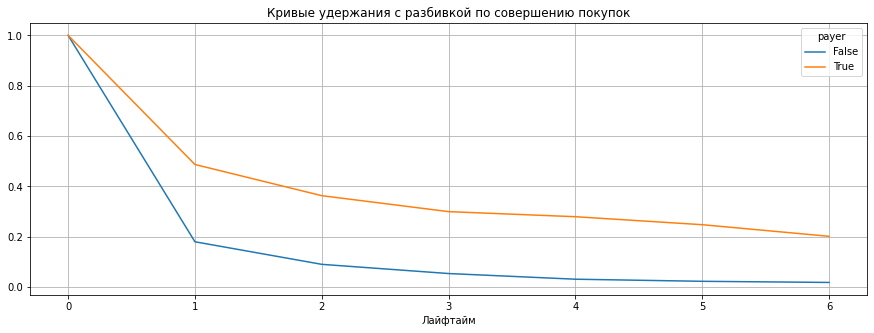

In [27]:
# удержание убывает по экспоненциальному закону
# строим кривые удержания

report = retention_grouped.drop(columns=['cohort_size'])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по совершению покупок')
plt.show()


Похоже, всё в порядке:
- первый день у платящих и неплатящих равно единицы,
- кривая удержания платящих пользователей выше, чем неплатящих,
- обе кривые постепенно снижаются.

**Проверим функцию get_conversion**


   - сумма размеров когорт равна общему числу новых клиентов в изучаемый период.
   - кривая конверсии плавно растёт от нуля в направлении единицы.
   - кривая конверсии не снижается.
   - в таблице конверсии нет значений, превышающих единицу.
   - количество новых покупателей равно числу новых клиентов, умноженному на общую конверсию.

In [28]:
# сумма размеров когорт равна общему числу новых клиентов в изучаемый период

chek = profilese.query('dt <= datetime(2019, 5, 8).date()')

print('''

Сумма размера когорт согласно профилям пользователя: {};
Сумма размера когорт согласно функции get_conversion: {}

'''.format(chek['user_id'].nunique(),
           conversion_grouped['cohort_size'].sum())
)



Сумма размера когорт согласно профилям пользователя: 7185;
Сумма размера когорт согласно функции get_conversion: 7185




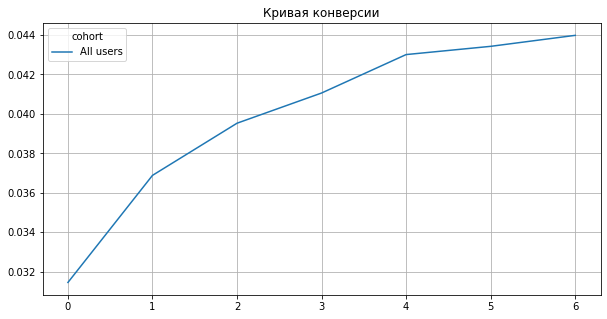

In [29]:
# строим кривую конверсии

report = conversion_grouped.drop(columns=['cohort_size'])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(10, 5))
plt.title('Кривая конверсии')
plt.show() 

На графике видим:
- конверсия не падает — значит, при расчёте были верно определены момент и горизонт анализа данных,
- в указанный период она не превышает единицу,
- рост конверсии выглядит нормальным.

Теперь убедимся, что в таблицах конверсий нет значений больше единицы. Сделаем срез таблицы конверсии по условию `> 1` и заменим остальные значения на пустую строку методом `fillna()`. Так в таблице останутся только значения больше единицы.

In [30]:
print(conversion_grouped[conversion_grouped > 1].fillna('')) 

           cohort_size 0.0 1.0 2.0 3.0 4.0 5.0 6.0
cohort                                            
All users         7185                            


В таблице конверсии остался только размер когорты — CR выше единицы нет.
То же самое проделаем с таблицей динамики конверсии.

In [31]:
print(conversion_in_time[conversion_in_time > 1].fillna('')) 

            cohort_size 0.0 1.0 2.0 3.0 4.0 5.0 6.0
dt                                                 
2019-05-01          909                            
2019-05-02          758                            
2019-05-03          849                            
2019-05-04         1015                            
2019-05-05          970                            
2019-05-06         1014                            
2019-05-07          888                            
2019-05-08          782                            


В таблице динамики конверсии на месте значений по лайфтаймам одни пропуски. 

Значит, ни в одной из ячеек нет ошибочного значения конверсии — выше единицы.


Наконец, проверим, равно ли число новых покупателей из таблицы с данными о покупках **orders** размеру когорты, умноженному на общую конверсию, то есть конверсию за последний лайфтайм.

In [32]:
# рассчитываем число покупателей по данным из таблицы конверсии

print(
    'Количество уникальных покупателей из таблицы конверсии: {:.0f}'.format(
        conversion_grouped['cohort_size'][0] * conversion_grouped[6][0]
    )
) 



# рассчитываем число покупателей по данным о покупках

# берём данные пользователей, привлечённых до 8 мая
report = orders.merge(
    profilese.query(
        'dt <= datetime(2019, 5, 8).date()'
    ),
    on='user_id',
)
# рассчитываем лайфтайм для каждой покупки
report['lifetime'] = (report['event_dt'] - report['first_ts']).dt.days
# исключаем лишние лайфтаймы
report = report.query('lifetime <= 6')

print(
    'Количество уникальных покупателей из таблицы заказов: {:.0f}'.format(
        len(report['user_id'].unique())
    )
) 

Количество уникальных покупателей из таблицы конверсии: 316
Количество уникальных покупателей из таблицы заказов: 316


Количество новых покупателей, рассчитанное двумя способами, совпадает. Похоже, конверсия верна.

**Проверим функцию get_ltv**

   - сумма размеров когорт равна общему числу новых клиентов в изучаемый период.
   - кривая LTV плавно растёт от нуля с возможным пересечением единицы.
   - кривая LTV не снижается.
   
  

In [33]:
# сумма размеров когорт равна общему числу новых клиентов в изучаемый период

chek = profilese.query('dt <= datetime(2019, 5, 8).date()')

print('''

Сумма размера когорт согласно профилям пользователя: {};
Сумма размера когорт согласно функции get_ltv: {}

'''.format(chek['user_id'].nunique(),
           ltv_grouped['cohort_size'].sum())
)



Сумма размера когорт согласно профилям пользователя: 7185;
Сумма размера когорт согласно функции get_ltv: 7185




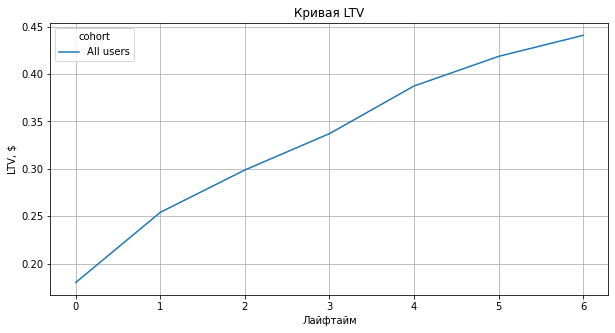

In [34]:
# строим кривую LTV

report = ltv_grouped.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('Кривая LTV')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show() 

На графике видим:
- кривая LTV растёт ожидаемым образом. Значит, мы верно определили момент и горизонт анализа данных.


**При расчёте CAC лишь убедитесь, что:**
   - CAC из таблицы ROI, умноженный на размер когорты, равен сумме рекламных трат за изучаемый период.
 

In [35]:
# Определим максимальную дату привлечения пользователей по столбцу dt из таблицы динамики ROI

max_acquisition_date = roi_in_time.reset_index()['dt'].max()
print(max_acquisition_date) 


# сравниваем расходы на привлечение в таблице ROI и тратах на рекламу

print(
   'Общие расходы на привлечение из таблицы ROI: {:.2f}'.format(
       roi_grouped.loc['All users', 'cac'] * roi_grouped.loc['All users', 'cohort_size']
   )
)

print(
   'Общие расходы на привлечение из таблицы costs: {:.2f}'.format(
       costs.query('dt <= @max_acquisition_date')['costs'].sum()
   )
) 

2019-05-08
Общие расходы на привлечение из таблицы ROI: 2319.95
Общие расходы на привлечение из таблицы costs: 2319.95


Таким образом мы проверили все функции на правильность! Можно двигатся дальше!


**Добавим функции для визуализации этих метрик**
- `filter_data()` - функция для сглаживания фрейма,
- `plot_retention()` - функция для визуализации удержания, 
- `plot_conversion()` - функция для визуализации конверсии, 
- `plot_ltv_roi()` - функция для визуализации LTV и ROI.

In [36]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [37]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=[]):

    # задаём размер сетки для графиков
    plt.figure(figsize=(20, 15))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [38]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=[]):

    # задаём размер сетки для графиков
    plt.figure(figsize=(18, 8))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [39]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=[]):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 15))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

**Мы добавили и проверили все необходимые нам функции для дальнейшего анализа, теперь давайте перейдем непосредственно к самому исследованию.** 

<a id=3_1></a>
### [3.1: Создадим пользовательские профили. Определим минимальную и максимальную даты привлечения пользователей](#content)


Ранее при проверке функций мы уже создали пользовательские профили и поместили их в переменнную **profilese**. Давайте выведем данные на экран и изучим их.

In [40]:
# выведем пользовательский профили на экран

print(f"Количество уникальных пользователей {profilese['user_id'].nunique()}")
print()
print(f"Доля платящих пользователей за все время составляет: {profilese['payer'].mean()}")
print()
print('Таблица пользовательских профилей:')
profilese.head(5)



Количество уникальных пользователей 150008

Доля платящих пользователей за все время составляет: 0.05920350914617887

Таблица пользовательских профилей:


,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


**Описание данных profilese**:
- `user_id` - их уникальный ID,
- `first_ts` - дата и время первой сессии,
- `channel` - канал привлечения,
- `device` - девайс,
- `region` - регион привлечения,
- `dt` - дата первого поссещения,
- `month` - месяц первого посещения,
- `payer` - платящий/неплатящий поьзователь,
- `acquisition_cost` - стоимость привлечения пользователя.

Согласно описанию к заданию в нашем распоряжении данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года.
Давайте сверим эту информацию с данными в таблице **profilese**.

In [41]:
# узнаем минимальную и максимальную дату согласно профилям пользователей.

print(f'''

Дата исследования с {profilese['dt'].min()} по {profilese['dt'].max()}.

''')



Дата исследования с 2019-05-01 по 2019-10-27.




<a id=3_2></a>
### [3.2: Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны](#content)


In [42]:
profilese

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [136]:
# напишем небольшую функцию для вывода сгруппирированной информации из профилей пользователя 
# и агрегирования нужной нам информации

def group_profilese(data, group):
    
    df = (
        profilese
        .groupby(group)
        .agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
        .sort_values(by=[('payer', 'mean')], ascending=False)
    ) 
    
    df.columns=['count_users', 'count_paying_users', 'share_of_paying, %']
    df['share_of_paying, %'] = round(df['share_of_paying, %'] * 100, 2)
    
    
    return df



In [137]:
# построим таблицу в которой посчитаем количество пользователей и долю платящих пользователей с разбивкой по странам
                 

group_profilese(profilese, 'region')

,count_users,count_paying_users,"share_of_paying, %"
region,,,
United States,100002,6902,6.90
Germany,14981,616,4.11
UK,17575,700,3.98
France,17450,663,3.80


**В нашем исследовании участвуют пользователи из:**
- США,
- Великобритании,
- Франции,
- Германии.

**Мы видим, что:**
- по количеству пользователей и доли платящих пользователей **США** сильно лидирует от остальных стран. 
- у **Великобритании** и **Франции** примерно одинаковое количество и доля платящих пользователей.
- меньше всего пользователей у **Германии**, но доля платящих пользователей у неё выше, чем у **Великобритании** и **Франции**.

<a id=3_3></a>
### [3.3: Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства](#content)


In [138]:
# построим таблицу в которой посчитаем количество пользователей и долю платящих пользователей с разбивкой по устройствам

group_profilese(profilese, 'device')

,count_users,count_paying_users,"share_of_paying, %"
device,,,
Mac,30042,1912,6.36
iPhone,54479,3382,6.21
Android,35032,2050,5.85
PC,30455,1537,5.05


**Мы видим:** 
- что пользователи могут заходить как с мобильных устройст, так и с компьютеров,
- больше всего пользователей зашло с **iPhone**,
- меньше всего пользователей пользуются **Mac**, но доля платящих пользователей у них больше, чем у остальных,
- меньше всего доля платящих пользователей у **PC**.



<a id=3_4></a>
### [3.4: Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения](#content)

In [139]:
# построим таблицу в которой посчитаем количество пользователей и долю платящих пользователей с разбивкой по каналам привлечения


group_profilese(profilese, 'channel')

,count_users,count_paying_users,"share_of_paying, %"
channel,,,
FaceBoom,29144,3557,12.20
AdNonSense,3880,440,11.34
lambdaMediaAds,2149,225,10.47
TipTop,19561,1878,9.60
RocketSuperAds,4448,352,7.91
WahooNetBanner,8553,453,5.30
YRabbit,4312,165,3.83
MediaTornado,4364,156,3.57
LeapBob,8553,262,3.06


У нас **10** каналов привлечения (не считая "органики").

**Что мы видим:**
- у FaceBoom больше всего привлеченных пользователей и доля платящих,
- у OppleCreativeMedia меньше всего доля платящих пользователей,
- меньше всего пользователей привлек канал lambdaMediaAds, но доля платящих пользователей у него на 3 месте.
- очень много пользователей пришли самостоятельнно без канала привлечения, но их доля меньшая из всех.

<a id=3_5></a>
### [3.5: Вывод подраздела](#content)

В нашем распоряжении данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года.

За это время у нас есть данные на **150 008** пользователей и примерно **70%** из них пришли из **США**.

Что касается девайсов, то большая часть, примерно **80%** у **iPhone** и **Mac**, которые как раз пользуются популярностью в Америке. Также пользователи пользуются и компьютерами и мобильными платформами.

Общая доля платящих пользователей за этот период около **6%** и равняется **8 881** пользователей со всего проекта.

Если смотреть в разбивке то доля платящих пользователей лучше:
- среди стран у **United States**, где количество пользователей составляет **100 002** и доля из них платящих равна	**7%**,
- среди устрайств у **Mac/iPhone**, где количество пользователей составляет **30 042/54 479** и доля из них платящих равна **6% / 6%**,
- среди источников у **FaceBoom**, где количество пользователей составляет **29 144** и доля из них платящих равна	**12%**.

Очень много пользователей пришло из "органики", но доля платящих из них меньше всего.

Маркетологи задействовали **10** каналов привлечения.




		


<a id=4></a>
## [4. Исследовательский анализ данных](#content)

<a id=4_1></a>
### [4.1: Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам. Визуализируем изменения метрик во времени](#content)

Общая сумма расходов на маркетинг составляет: 105497


''

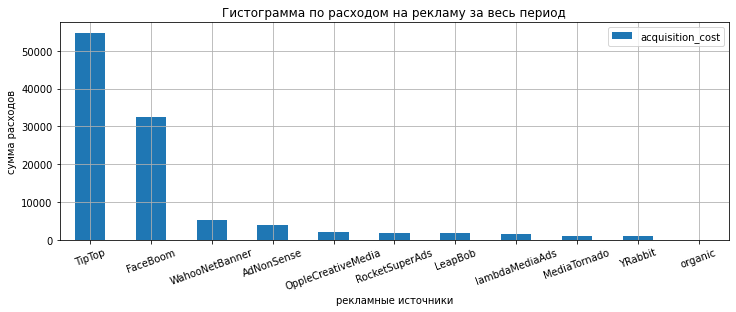

In [46]:
# рассчитаем общую сумму расходов на маркетинг

print(f"Общая сумма расходов на маркетинг составляет: {round(profilese['acquisition_cost'].sum())}")



(
    profilese.pivot_table(index='channel',
                          values='acquisition_cost',
                          aggfunc='sum')
    .sort_values(by='acquisition_cost', ascending=False)
    .plot(kind='bar', grid=True, figsize=(12, 4))
    
)
plt.title('Гистограмма по расходом на рекламу за весь период')
plt.xlabel('рекламные источники')
plt.ylabel('сумма расходов')
plt.xticks(rotation=20)
;

Мы выяснили общую сумму расходов на рекламу, давайте теперь посмотрим на распределение по источникам и самые "дорогие" источники привлечения рекламы. 

Построим несколько графиков: 
- кривая сумы расходов за месяц с разбивкой по каналам привлечения,
- кривая сумы расходов по дате привлечения с разбивкой по каналам привлечения,
- динамика суммы расходов за месяц с разбивкой по каналам привлечения.

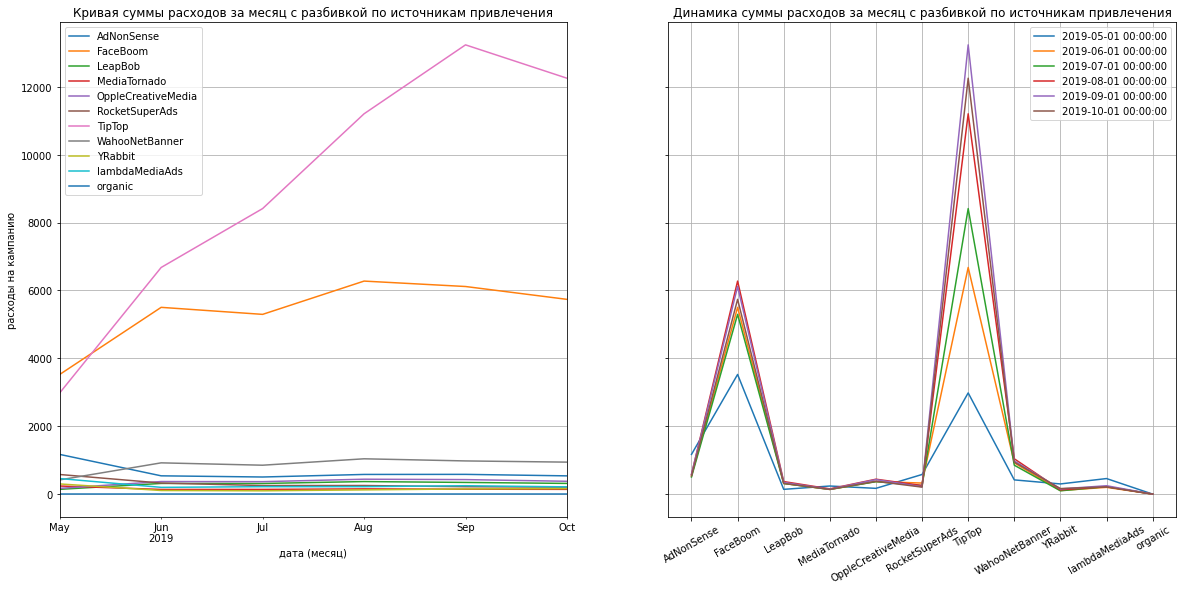

In [47]:
plt.figure(figsize=(20, 20))

ax1 = plt.subplot(2, 2, 1)

profilese.pivot_table(index='channel', columns='month', values='acquisition_cost', aggfunc='sum').T.plot(
    grid=True, ax=ax1)
plt.title('Кривая суммы расходов за месяц с разбивкой по источникам привлечения', fontsize=12)
plt.legend()
plt.xlabel('дата (месяц)')
plt.ylabel('расходы на кампанию')


ax2 = plt.subplot(2, 2, 2, sharey = ax1)

profilese.pivot_table(index='channel', columns='month', values='acquisition_cost', aggfunc='sum').plot(
    grid=True, ax=ax2, xticks=(range(profilese['channel'].nunique())))
plt.title('Динамика суммы расходов за месяц с разбивкой по источникам привлечения', fontsize=12)
plt.legend()
plt.xticks(rotation=30)
plt.xlabel('');






Ранее на гистограмме и сейчас на графиках мы видим, что большую долю всех расходов на рекламные компании уходят на два источника:
- TipTop
- FaceBoom

Давайте подробнее изучим расходы на эти источники и насколько они окупаются.


In [48]:
print('Доля пользователей, которая пришла из источников TipTop и FaceBoom не считая "органики" составляет {0:.2%}'
      .format((profilese
              .query('channel == "TipTop" or channel == "FaceBoom"')['user_id'].nunique() 
              / profilese.query('channel != "organic"')['user_id'].nunique())
             )
     )

print('Доля платящих пользователей, которая пришла из источников TipTop и FaceBoom не считая "органики" составляет {0:.2%}'
      .format((profilese
              .query('(channel == "TipTop" or channel == "FaceBoom") and payer == True')['user_id'].nunique() 
              / profilese.query('payer == True and channel != "organic"')['user_id'].nunique())
             )
     )

Доля пользователей, которая пришла из источников TipTop и FaceBoom не считая "органики" составляет 52.05%
Доля платящих пользователей, которая пришла из источников TipTop и FaceBoom не считая "органики" составляет 70.39%


Таким образом мы видим, что эти два канала привлекли около половины всех пользователей (не считая органики), и к тому же доля платящих пользователей из этих источников около **70%**.

<a id=4_2></a>
### [4.2. Узнаем, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика. Используем профили пользователей](#content)

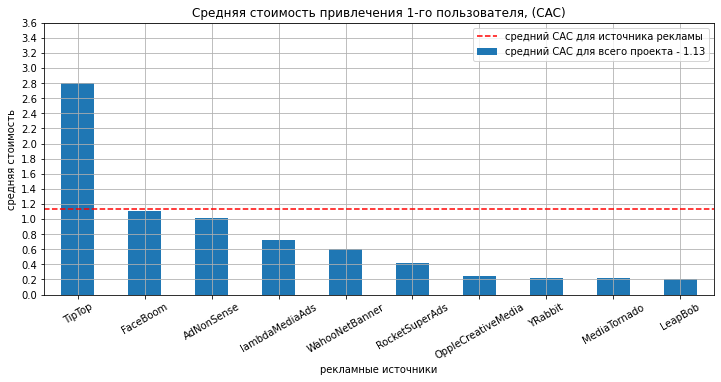

In [49]:
# расчитаем среднею стоимость привлечения 1-го пользователя
# уберем из расчетов органических пользователей, чтобы они не влияли на результаты
# построим гистограмму и нанесем на него линию с общей средней стоимости привлечения за весь проект

(
profilese
    .query('channel != "organic"')
    .groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .sort_values(by='acquisition_cost', ascending=False)
    .plot(kind='bar', grid=True, figsize=(12, 5))
)

plt.title('Cредняя стоимость привлечения 1-го пользователя, (CAC)')

plt.xticks(rotation=30)
plt.yticks(ticks=np.arange(0, profilese['acquisition_cost'].max(), 0.2))

plt.xlabel('рекламные источники')
plt.ylabel('средняя стоимость')

plt.axhline(y=profilese.query('channel != "organic"')['acquisition_cost'].mean(), color='red', linestyle='--')


plt.legend(['средний CAC для источника рекламы', 'средний CAC для всего проекта - {:.2f}'
            .format(profilese.query('channel != "organic"')['acquisition_cost'].mean())]);

На графике мы видим:
- САС для всего проекта приблизительно составляет **1,13**,
- все источники, за исключением TipTop, имеют меньший САС чем средний или такой же, как в случае с FaceBoom,
- у TipTop самый большой САС и он сильно влияет на средний САС за весь проект.

<a id=4_3></a>
### [4.2: Выводы подраздела](#content)

У нас есть **10** источников привличения пользователей, не считая тех, кто пришел самостоятельнно.

Общая сумма расходов на маркетинг составляет: **105 497**

Большую долю всех расходов на рекламные компании уходят на два источника:

- **TipTop**
- **FaceBoom**

Доля пользователей, которая пришла из источников **TipTop и FaceBoom** не считая "органики" составляет **52.05%**

Доля платящих пользователей, которая пришла из источников **TipTop и FaceBoom** не считая "органики" составляет **70.39%**


Таким образом мы видим, что **эти два канала привлекли около** половины всех пользователей (не считая органики), и к тому же **доля платящих пользователей** из этих источников около **70%**.

<a id=5></a>
## [5. Изучение маркетинга](#content)

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. 

Считаем, что **на календаре 1 ноября 2019 года**, а в бизнес-плане заложено, что пользователи должны окупаться **не позднее** чем через **две недели** после привлечения. 

Таким образом для дальнейшего исследования мы будем считать:
- момент анализа **1 ноября 2019 года**,
- горизон 2 недели (**14 дней**).

Поскольку доля органических пользователей слишком большая, я предлагаю их исключить из дальнейшего исследования.

In [50]:
# исключим органических пользователей из профилей пользователей

new_profilese = profilese.query('channel != "organic"')

print(f"В нашем исследовании будет принимать участие {len(new_profilese)} пользователей.")

В нашем исследовании будет принимать участие 93569 пользователей.


In [51]:
# зададим момент и горизон анализа

observation_date = datetime(2019, 11, 1).date()
horizen_date = 14

<a id=5_1></a>
###  [5.1: Проанализируем общую окупаемость рекламы](#content)

Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

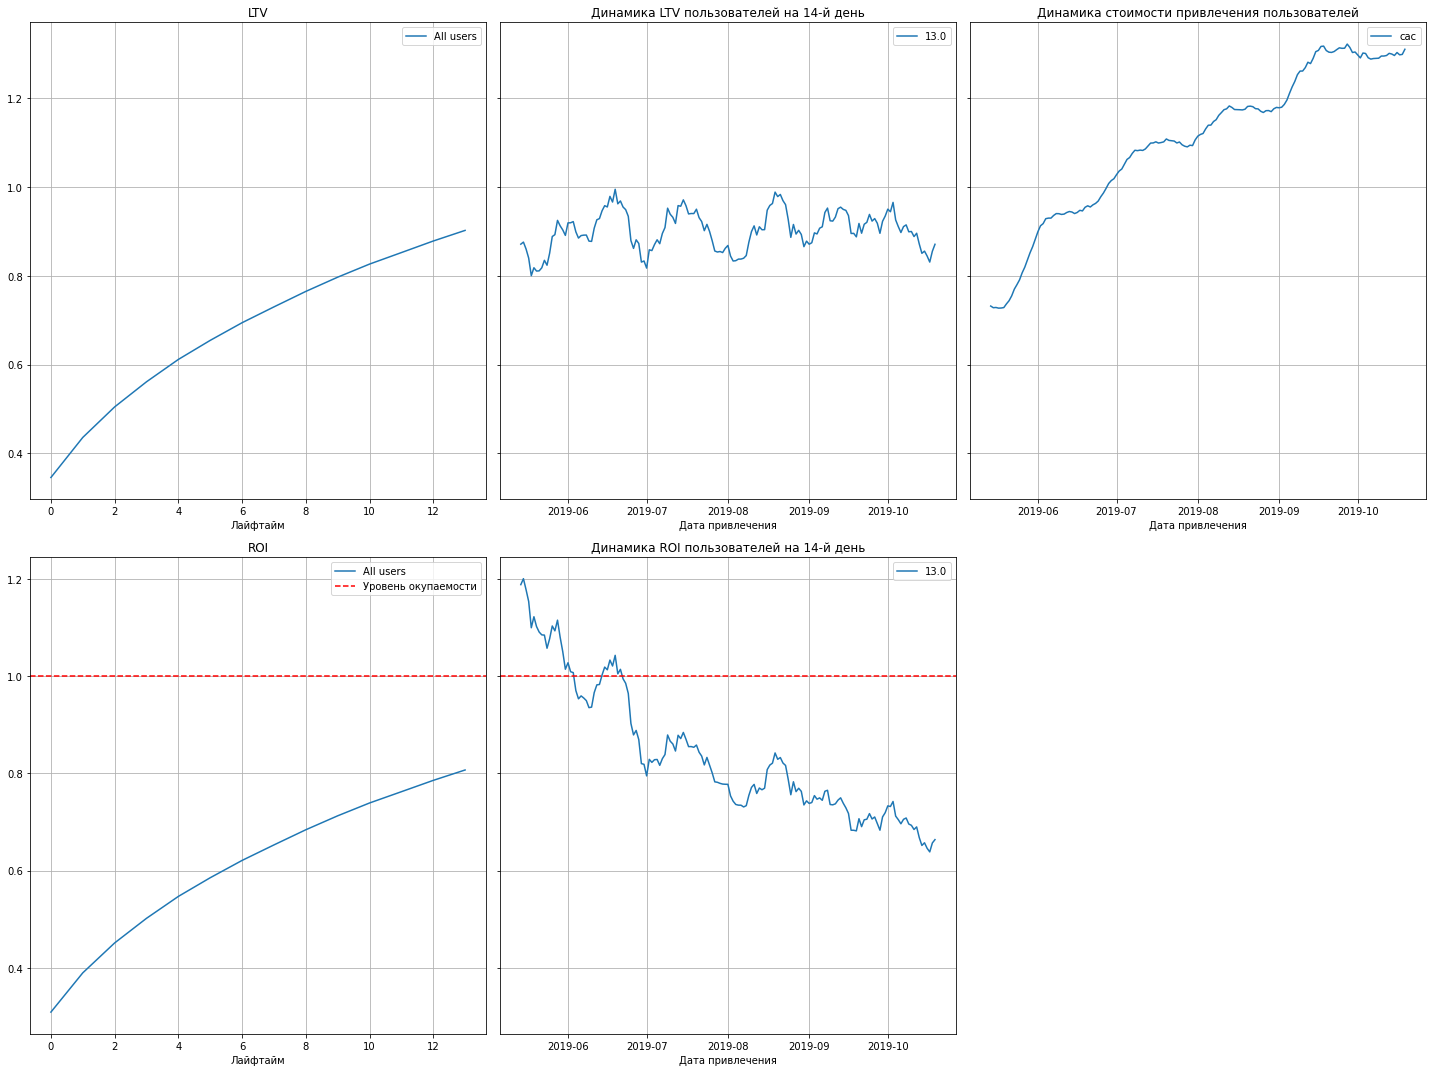

In [52]:
# применим функцию get_ltv для получения необходимых данных


ltv_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv(new_profilese, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizen_date, 
                                                                      )

# построим графики функцией plot_ltv_roi установим окно сглаживания на 14

plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizen_date, window=14) 

**Мы видим:**
- реклама не окупается, к концу второй недели ROI около 80%,
- CAC стабильно растет, может быть дело в увиличении рекламного бюджета,
- можем заметить окупаемость рекламы у пользователей привлеченных примерно до середины июня.

**Думаю дело в постоянном увеличении рекламного бюджета**, поначалу у пользователей привлеченных до середины июня реклама окупалась.

<a id=5_2></a>
### [5.2: Проанализируем окупаемость рекламы с разбивкой по рекламным каналам](#content)

Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

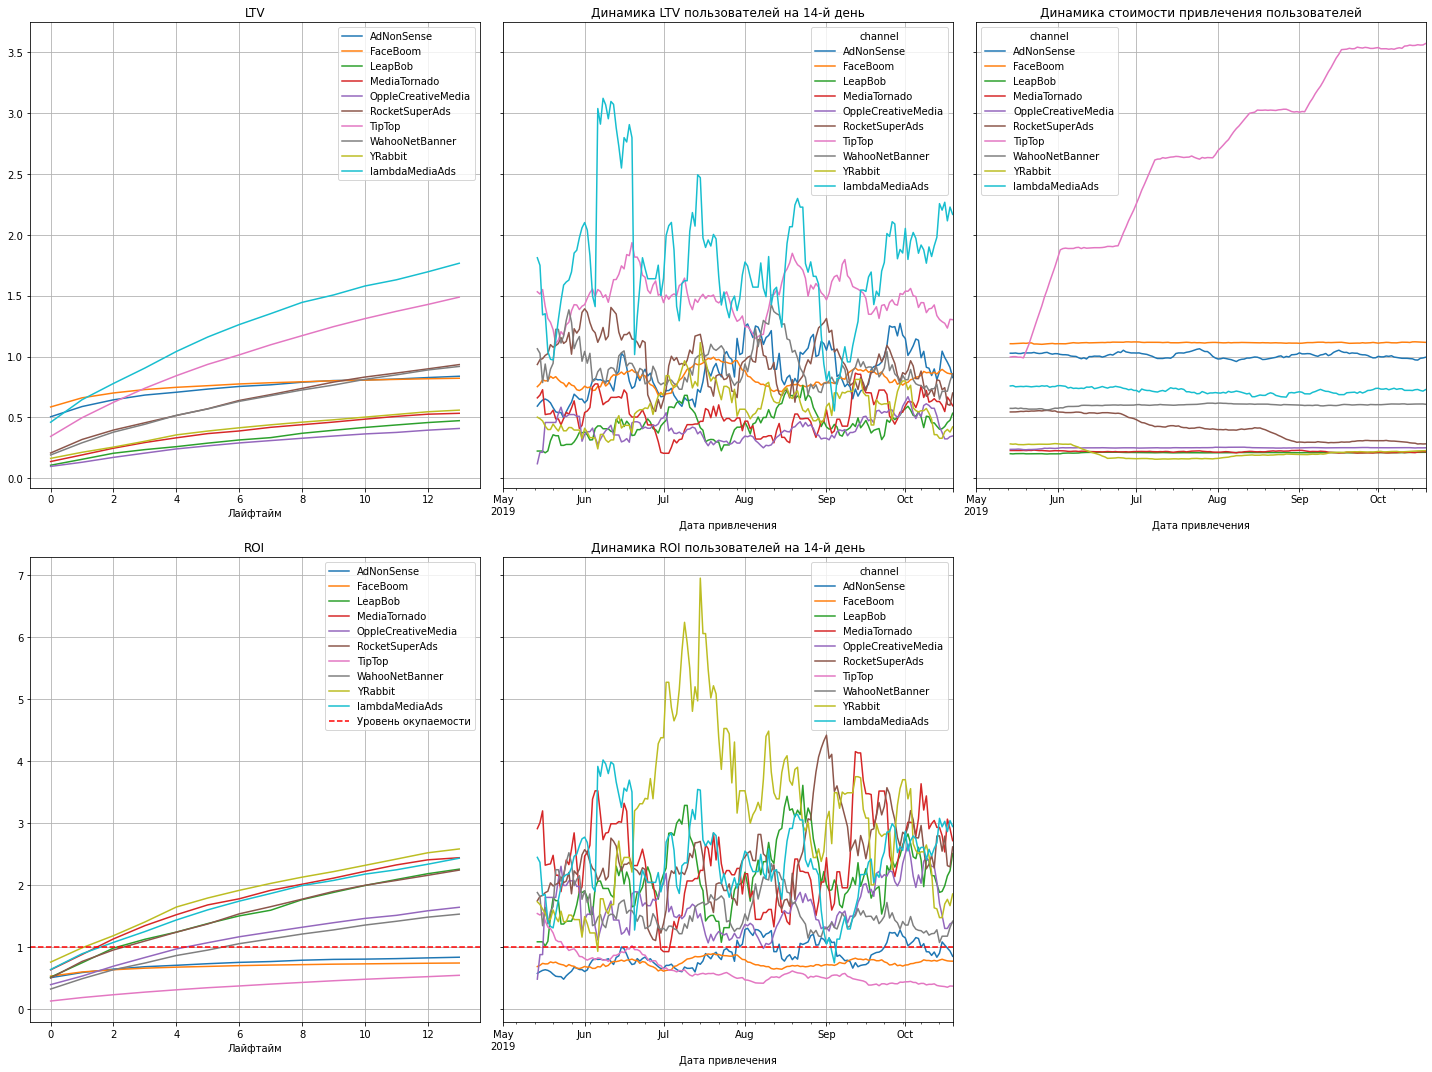

In [53]:
# посмотрим окупаемость с разбивкой по рекламным каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv(new_profilese, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizen_date, 
                                                                      dimensions=dimensions
                                                                     )

# окно сглаживание оставим 14

plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizen_date, window=14) 

**Мы видим:**
- повышения уровны САС лишь у одного источника - **TipTop**, причем стоимость привлечения сильно росла со временем,
- реклама начала окупатся за первую неделю у всех источников, кроме: TipTop, FaceBoom и AdNonSense - а это одни из самых дороги источников привлечения и они не окупились даже на 2-ю неделю привлечения,
- видим большую сезонную окупаемость с июля по середину августа у источника **YRabbit**, 


В общем мы видим ту же картину, что и ранее отметили - постоянное увиличение рекламного бюджета. В первые две недели жизни пользователи показывали хороший LTV у двух источников:
- lambdaMediaAds и
- TipTop
может быть именно из-за этого маркетологи решили увеличить буджет рекламы у источника TipTop, причем увеличение бюджета было достаточно стремительнным, к тому же бюджет на другие источники маркетологи старались сохранить минимальным. 




<a id=5_3></a>
### [5.3: Проанализируем окупаемость рекламы с разбивкой по странам](#content)

Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

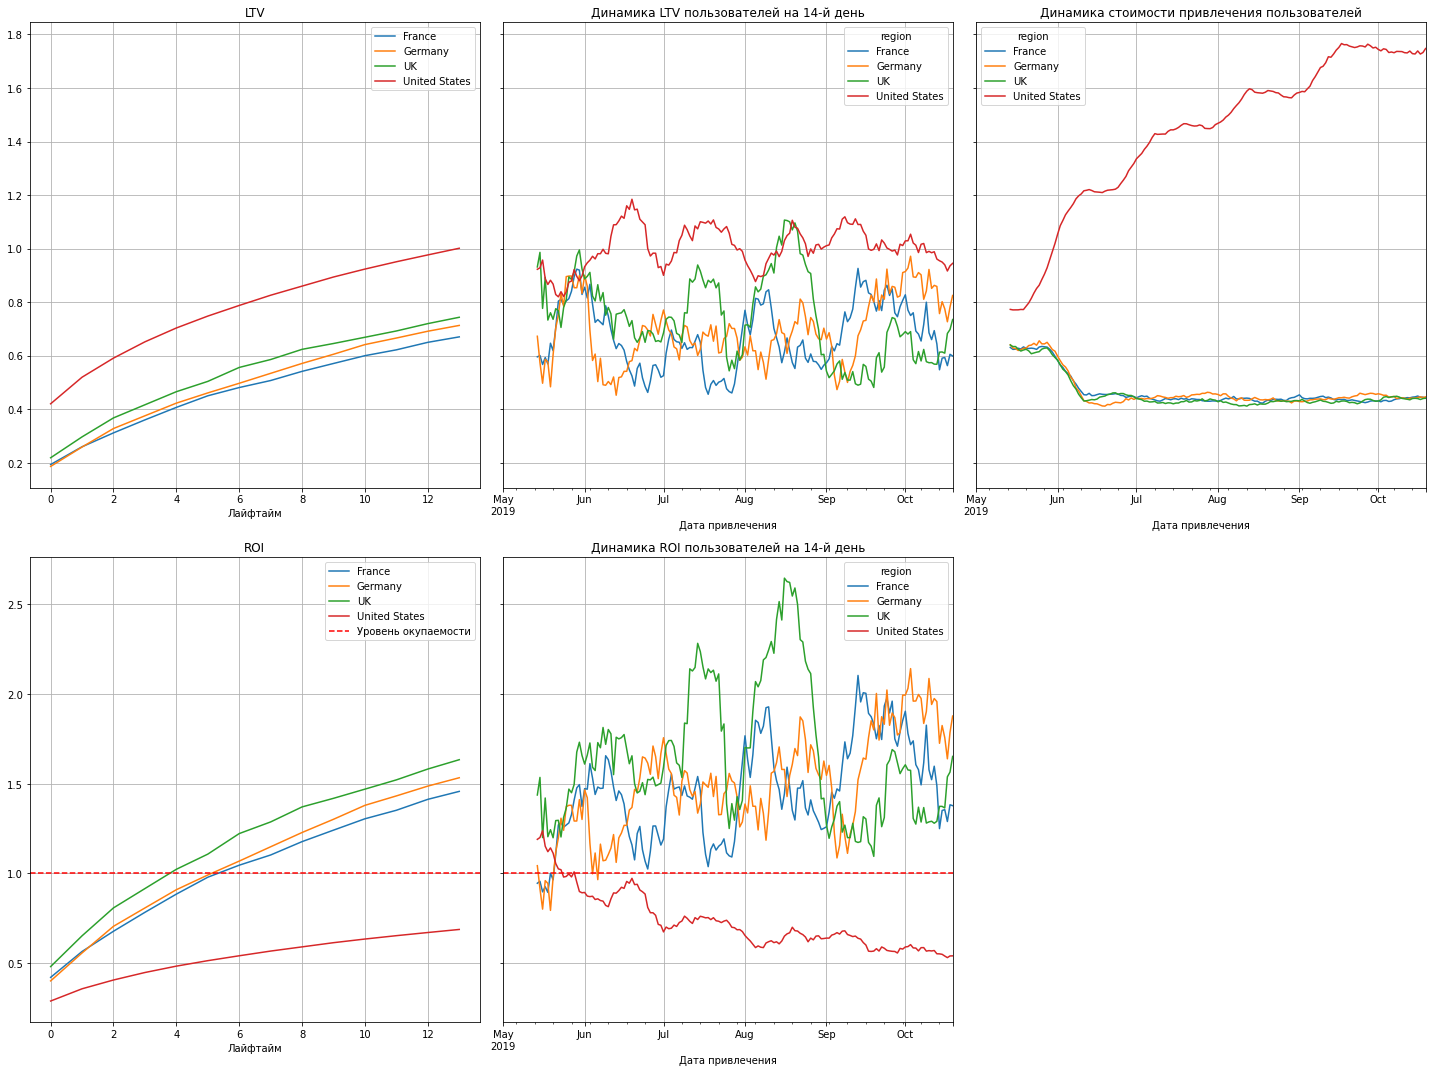

In [54]:
# посмотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv(new_profilese, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizen_date, 
                                                                      dimensions=dimensions
                                                                     )

# окно сглаживание оставим 14

plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizen_date, window=14) 

Видим, то же самое, что и ранее. По всей видимости маркетологи увидели за первые 2 недели, что LTV у пользователей из США самый высокий рост и динамика и решили увеличить рекламный бюджет для привлечения пользователей из этого региона.

Чтобы проверить нашу гипотезу, давайте выясним из каких регионов и какие источники рекламы больше всего привлекали пользователей. Построим таблицу, органические пользователи не учитываются.

In [55]:
# построим сводную таблицу и проверим число привлеченных пользователей по стране и источнику

new_profilese.pivot_table(index='region', columns='channel', values='user_id', aggfunc='nunique').fillna(0)

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
region,,,,,,,,,,
France,1366.0,0.0,2988.0,0.0,2991.0,0.0,0.0,2971.0,0.0,742.0
Germany,1219.0,0.0,2519.0,0.0,2562.0,0.0,0.0,2579.0,0.0,649.0
UK,1295.0,0.0,3046.0,0.0,3052.0,0.0,0.0,3003.0,0.0,758.0
United States,0.0,29144.0,0.0,4364.0,0.0,4448.0,19561.0,0.0,4312.0,0.0


Думаю, что произошло следующее:

- маркетологи увидели, что LTV у пользователей из США с первых дней жизни почти в 2 раза выше, чем у пользователей из других регионов,
- далее они выбрали один из всех каналов привлечения пользователей из США с самым высоким показателем LTV и увеличили финансирование рекламы в этом канале.

Но, почему с увеличением финансирование рекламы не увеличивался LTV и ROi этих пользователей, давайте далее рассмотрим коэфициент удержания и конверсии и попробуем разобраться.

<a id=5_4></a>
###  [5.4: Построим и изучим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам](#content)


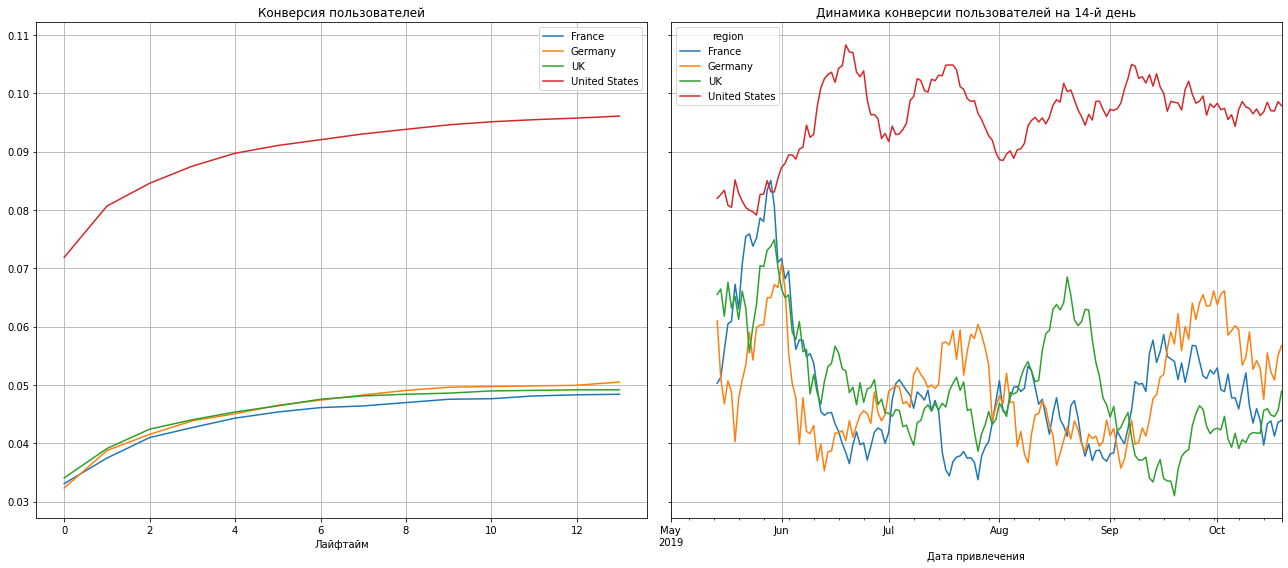

In [56]:
# смотрим конверсию с разбивкой по странам



conversion_raw, conversion_grouped, conversion_in_time = get_conversion(
    new_profilese, orders, observation_date, horizen_date, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_in_time, horizen_date, window=14) 

Судя по графику мы видим, что пользователи из США конвертируются хорошо, причем постоянно. 

Давайте посмотрим на конверсию пользователей с разбивкой по устройствам.

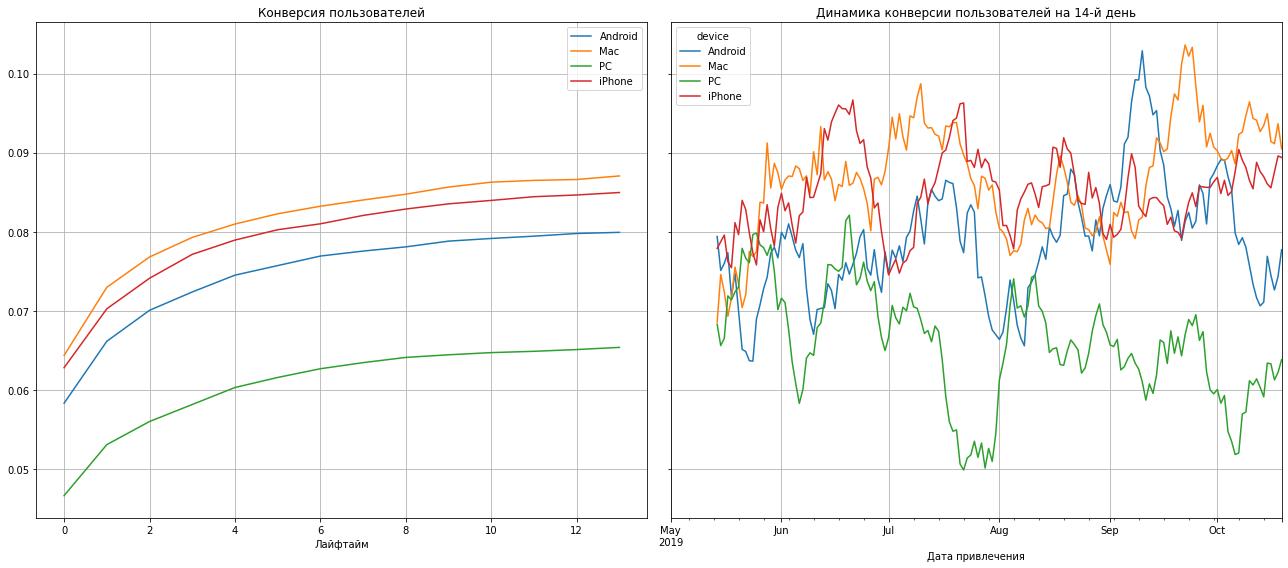

In [57]:
# смотрим конверсию с разбивкой по устройствам

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_in_time = get_conversion(
    new_profilese, orders, observation_date, horizen_date, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_in_time, horizen_date, window=14) 

**Iphone и Mac** лучше всего конвертируются и также постоянно, хуже всех PC. Мы можем предположить, что эти устройства в основном пользуются пользователи из США, давайте на всякий случай построим таблицу в которой узнаем пользователи из каких регионов какие предпочитают гаджеты.

In [58]:
# построим сводную таблицу и посчитаем самые популярные гаджеты в регионах

new_profilese.pivot_table(index='region', columns='device', values='user_id', aggfunc='nunique').fillna(0)

device,Android,Mac,PC,iPhone
region,,,,
France,3313,1163,4384,2198
Germany,2849,1020,3797,1862
UK,3243,1086,4551,2274
United States,12436,15424,6421,27548


Так и есть самые популярные гаджеты в США это **Iphone и Mac**.

Посмотрем конверсию по рекламным компаниям.

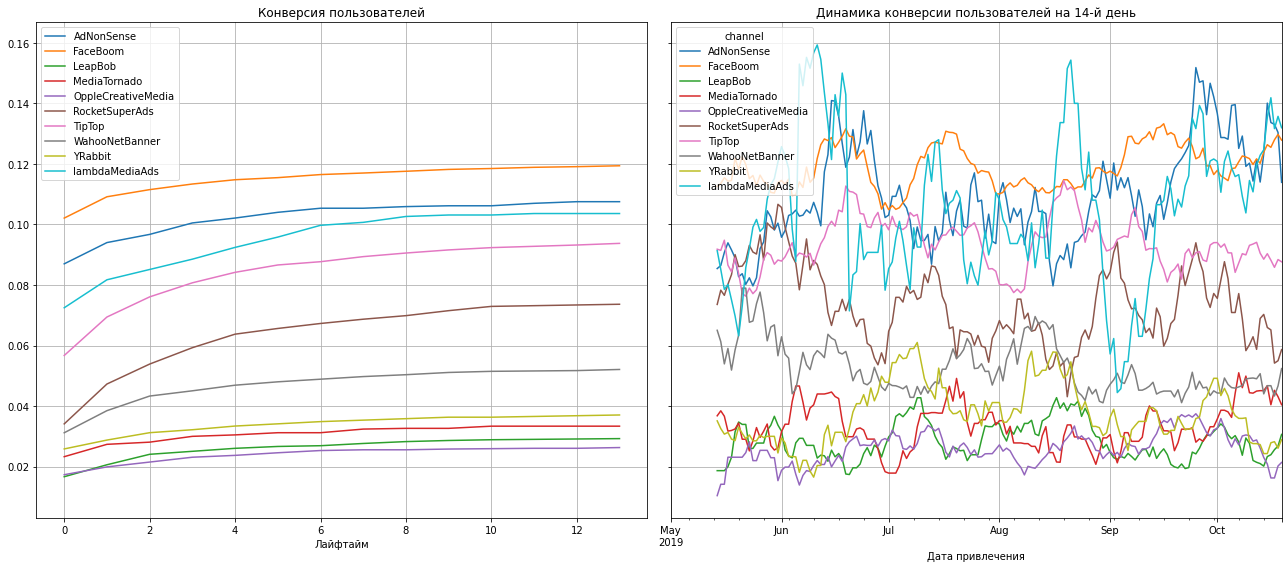

In [59]:
# смотрим конверсию с разбивкой по источникам рекламы

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_in_time = get_conversion(
    new_profilese, orders, observation_date, horizen_date, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_in_time, horizen_date, window=14) 

Лучшая конверсия у источника **FaceBoom**, причем постоянная - это тот источник, который больше всего привлекал пользователей из США, в то время конверсия у **TipTop** на 4 месте, причем тоже стабильно. 

На втором и третем месте по лучшей конверсии у источников **AdNonSense** и **lambdaMediaAds** - эти 2 источника привлекают пользователей из всех регионов, кроме США.


Давайте посмотрим на коэфициенты удержания и построим графики с разбивкой по: стране, устройству и источнику привлечения.

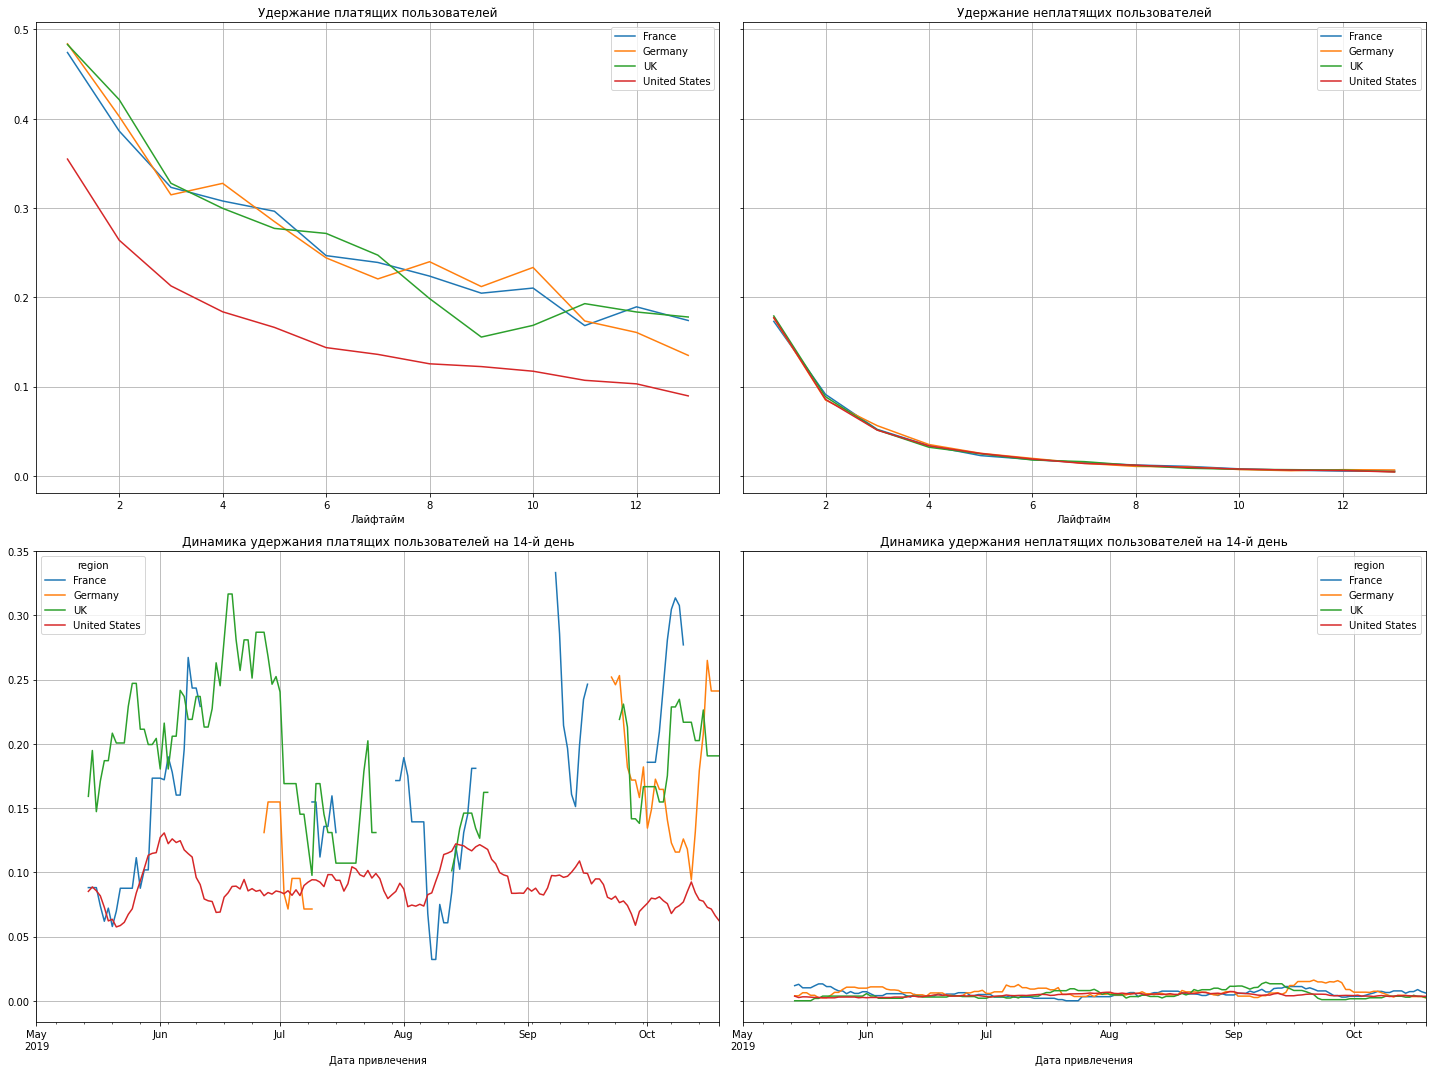

In [60]:
# смотрим удержание с разбивкой по стране

dimensions = ['region']

retention_raw, retention_grouped, retention_in_time = get_retention(
    new_profilese, visits, observation_date, horizen_date, dimensions=dimensions
)

plot_retention(retention_grouped, retention_in_time, horizen_date, window=14) 

Мы видим, что платящие пользователи из США стабильно плохо удерживаются.

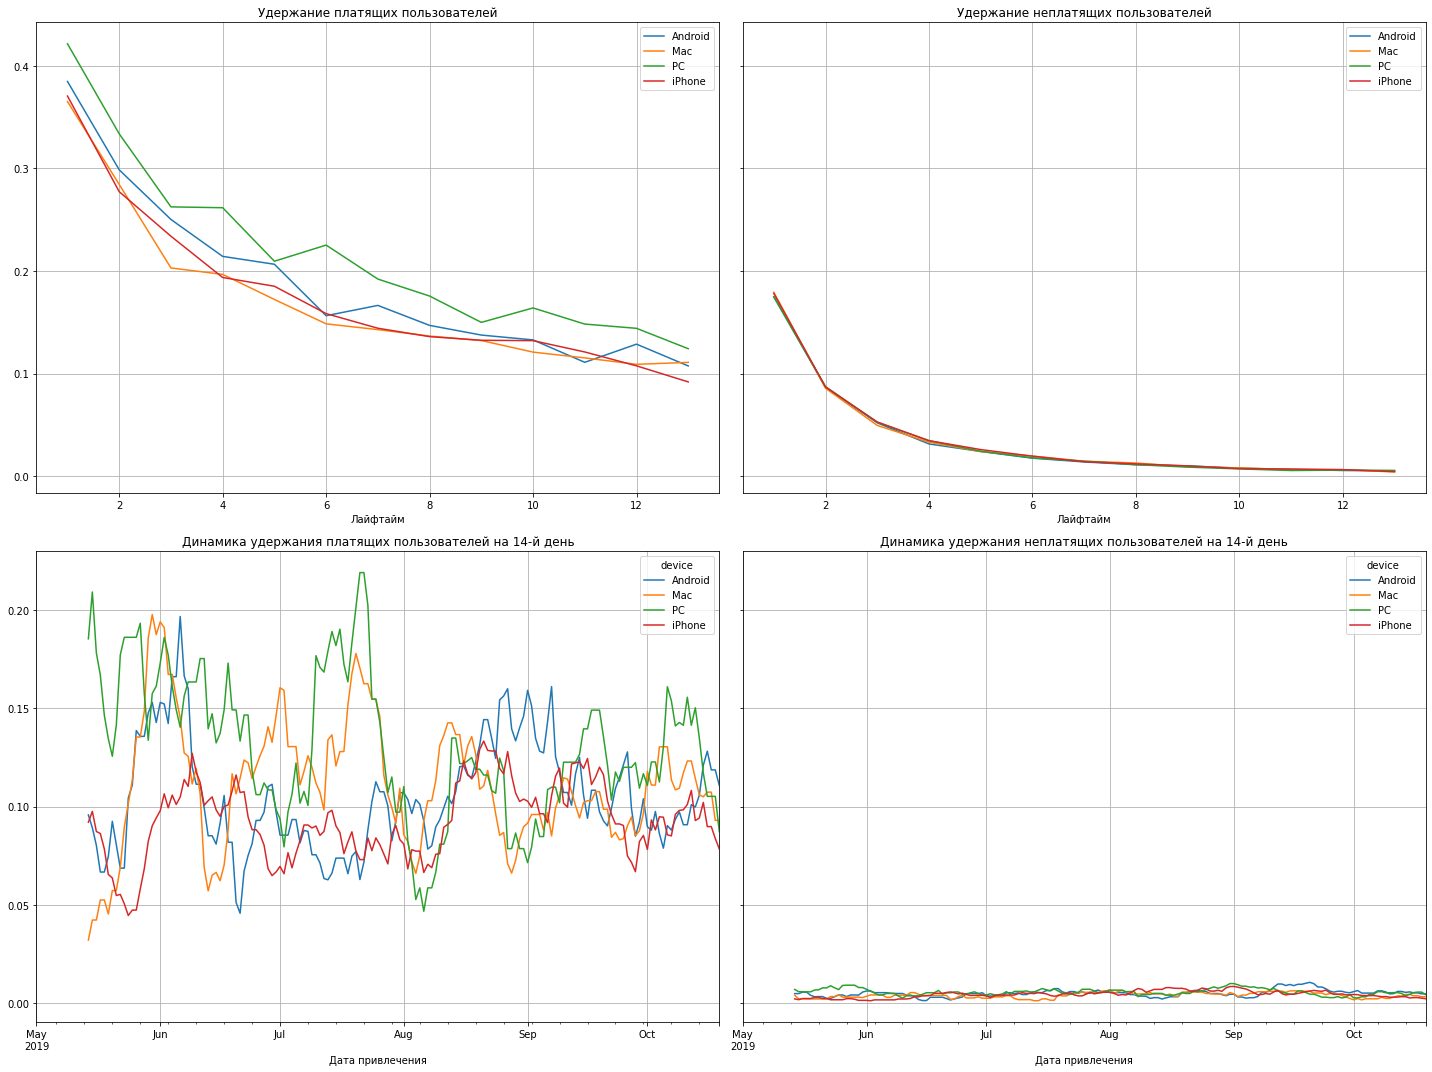

In [61]:
# смотрим удержание с разбивкой по устройствам

dimensions = ['device']

retention_raw, retention_grouped, retention_in_time = get_retention(
    new_profilese, visits, observation_date, horizen_date, dimensions=dimensions
)

plot_retention(retention_grouped, retention_in_time, horizen_date, window=14) 

Лучше всего удерживаются пользователи PC, а хуже всего опять те гаджеты, которые популярны в США.

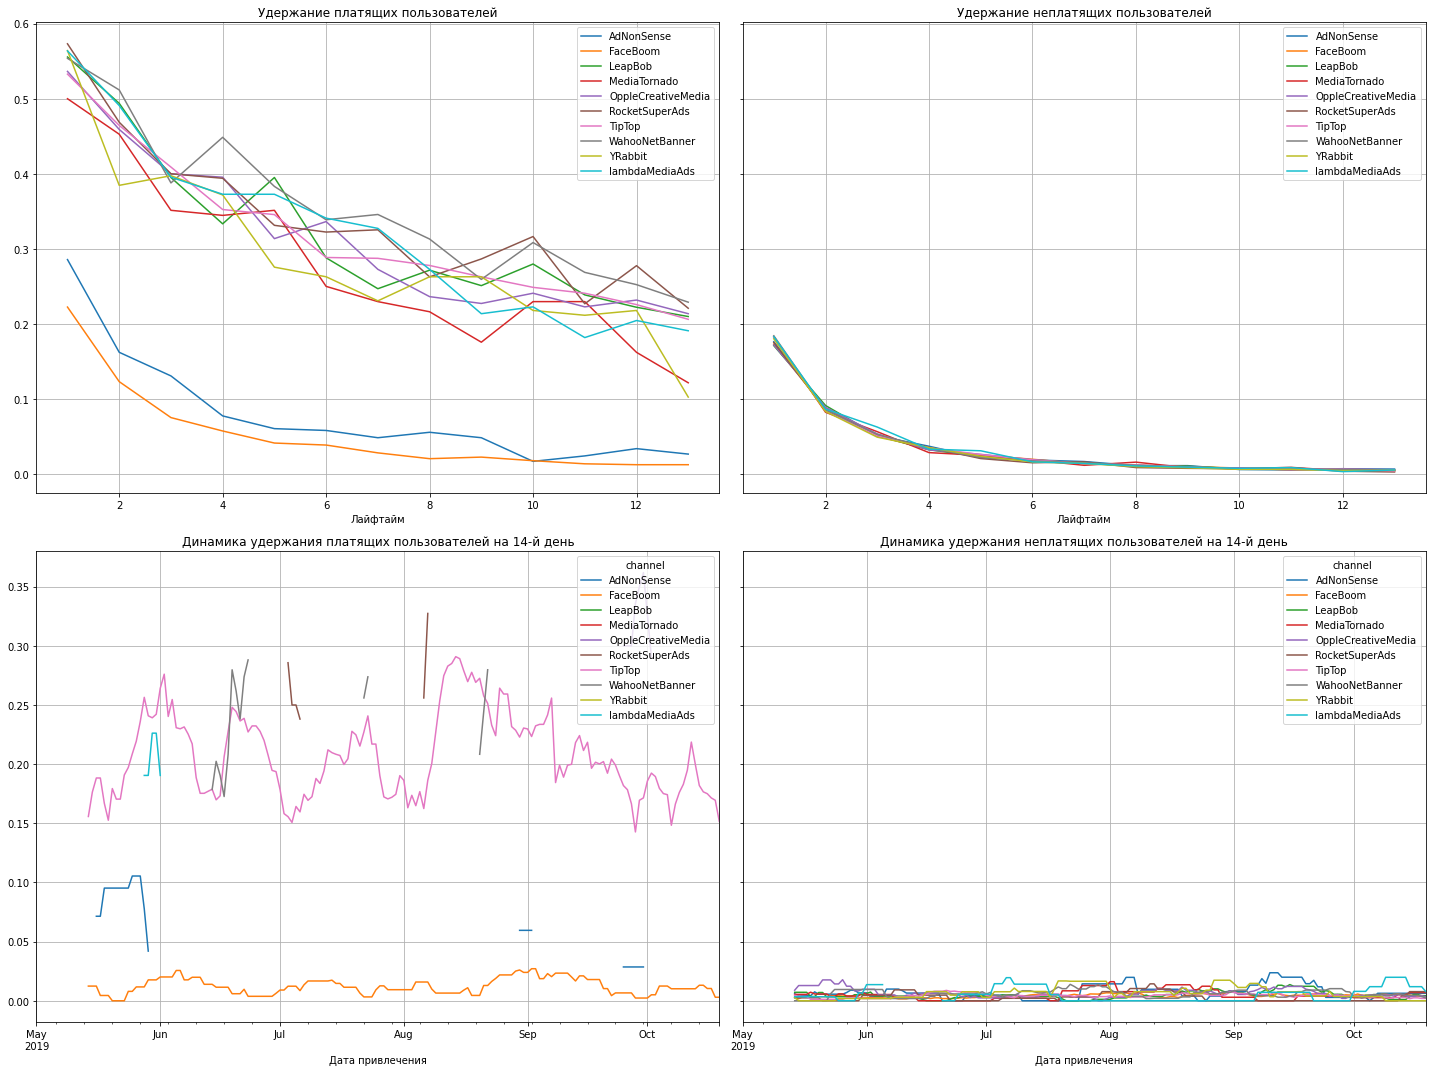

In [62]:
# смотрим удержание с разбивкой по 

dimensions = ['channel']

retention_raw, retention_grouped, retention_in_time = get_retention(
    new_profilese, visits, observation_date, horizen_date, dimensions=dimensions
)

plot_retention(retention_grouped, retention_in_time, horizen_date, window=14) 

А вот и ответ почему маркетологи, если хотели привлечь больше пользователей из штатов не выбрали в качестве источника FaceBoom, удержание у этих пользователей ко второй недели меньше 5%. 

<a id=5_5></a>
###  [5.5: Вывод подраздела](#content)

Давайте еще раз все подитожем и начнем с самого начала, чтобы не запутаться.

**В нашем распоряжении данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:**

**Количество уникальных пользователей: 150 008 человек.**

**Пользователи приходили из 4 регионов:**
- France,
- Germany,
- UK,
- United States.

Из исследования мы **исключили органических пользователей!**, поскольку мы изучали траты на маркетинг, и поскольку доля органических пользователей ото всех очень велика, что конечно могло повлиять на анализ метрик. 

**В ходе исследования мы выявили 10 каналов привлечения, которые можно поделить на 2 подгруппы:**
 - источники привлечающие **только пользователей из США**:
  - `FaceBoom`,
  - `MediaTornado`,
  - `RocketSuperAds`,
  - `TipTop`,
  - `YRabbit`.
  
 - источники привлекающие **пользователей из Франции, Германии и Великобритании.**
  
  - `AdNonSense`,
  - `LeapBob`,
  - `OppleCreativeMedia`,
  - `WahooNetBanner`,
  - `lambdaMediaAds`.

Большая часть пользователей приходила из США, а самы популярные гаджеты соответствовали самым популярным гаджетам в **США: iPhone и MAC**.

**Ответьте на такие вопросы:**
- Окупается ли реклама в целом?
- Какие устройства, страны и каналы могут снижать окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости?

- Здесь важно отметить, что в исследовании мы не рассматривали органических пользователей, доля которых достаточна велика. А, что касается окупаемости рекламы, то она не окупилась, к концу второй недели ROI составлял приблизительно 80%.
- Можем заметить, что примерно в середине июня маркетолого нарастили бюджет увеличев его в разы и продолжали увеличивать до конца отведенного нам периода исследования, можно предположить, что они увидели хорошие показания LTV для пользователей из США и гаджетами более популярными в этой стране (iPhone и MAC), а также хорошую конверсию этих пользователей. В качестве канала привлечения они выбирали один из 5 каналов привлекающих пользователей из США, и их выбор пал на канал TipTop, возможно вследствии того, что его LTV был высок и уровень удержания был примерно средним среди всех других источников.
- Проблемы могут быть вызваны резким увеличение расходов на рекламу именно на этот источник и плохим удержанием пользователей из США, и популярных там гаджетов.

<a id=6></a>
## [6. Изучение окупаемости рекламы](#content)

<a id=6_1></a>
### [6.1: Выделите причины неэффективности привлечения пользователей](#content)


**В первую** очередь стоит проверить плохое удержание пользователей из США, а также источников привлечения этого региона и в следствии популярных там гаджетов.

**Во-вторых**: следует пересмотреть расходы на бюджет рекламной компании, в частности на источник TipTop, потому что на графиках видно резкое увеличение бюджета примерно с середины июня и это увеличение продолжалось до конца отведенного периода исследования. 

 **В третьих**: мы видим неплохие метрики у пользователей из других регионов (не США). Да, конверсия этих пользователей не высокая, но и расходы на их привлечение не высоки, можно заметить, что расходы на их привлечения снизились, но они по прежнему показывали окупаемость.


<a id=6_2></a>
### [6.2: Сформулируйте рекомендации для отдела маркетинга](#content)

Как я уже описал выше, надо пересмотреть расходы на рекламную компанию **TipTop**, которая приводит пользователей из США.

Раз уж акцент сделали на пользователей из этого региона, то надо изучить, почему у них очень плохое удержание, а для этого изучить наиболее популярные гаджеты в этой стране. Да мы видели, что конверсия и LTV у пользователей из этого региона выше остальных, но они слишком быстро уходят. Может быть проблема в техническом характере, надо изучить данные с событиями, которых, к сожалению у меня нет. 

Стоить также обратить внимание и на другие регионы, у них удержание заметно лучше, но слишком плохая конверсия. Но несмотря на снижения бюджета на привлечение таких пользователей они показывают окупаемость.

Стоит еще обратить внимание на рекламную компанию **FaceBoom** у нее проблемы с удержанием и следовательно возникает вопрос о заинтересованости привлекаемых пользователей.